![](https://drive.google.com/uc?id=131WXvMdvlKDxIk0Pa1qHkU3hkey5ChGj)

# **<span style="color:#e76f51;">What is Differential Privacy ?</span>**

Differential privacy is a rigorous mathematical definition of privacy.  An algorithm is said to be differentially private if an adversary cannot use auxiliary information to reverse engineer the sensitive data .

# **<span style="color:#e76f51;">Why anonymization is not sufficient ?</span>**

Private data of patients in healthcare has huge potential to transform medical treatments . However exposing such data comes with substantial risk to privacy .Anonymization of features is no longer sufficient when exposing sensitive data .


In the 1990s , the Massachusetts Group Insurance Commission decided to release anonymized data on state employees that showed every single hospital visit . The goal was to help researchers, and the state spent time removing all obvious identifiers such as name, address, and Social Security number.In 1997 , Latanya Sweeney , a graduate student at MIT was able to identify medical record of Governor William Weld using zip code , birth date and voter registration records from Cambridge , Massachusetts .

![](https://drive.google.com/uc?id=1exheko3vbEd14tLo1bDts8p7l9hgZ4Sk)

Netflix released an anonymized viewing dataset for a competition to build a better recommendation engine in 2006 . Narayanan and Shmatikov were able to re-identify users by merging it with the IMDB dataset .

![](https://drive.google.com/uc?id=1TvLJyuPMejOCDOTiCFU2sa9qGs-LTH4K)

# **<span style="color:#e76f51;">How does Differential Privacy work ?</span>**


Differentially-private algorithms incorporate random noise to the original data , so that it becomes difficult for the adversaries to breach privacy

# **<span style="color:#e76f51;">Privacy Loss :</span>**

It is an additional risk to an individual by using auxiliary knowledge to re-identify them .

# **<span style="color:#e76f51;">Limitations of Differential Privacy :</span>**

The details about the original data can be estimated by making repeated queries about the data .

# **<span style="color:#e76f51;">Diffprivlib :</span>**

Diffprivlib is a general-purpose library from IBM for experimenting with, investigating and developing applications in, differential privacy.

Diffprivlib can be used for 

📌 Experiment with differential privacy.

📌 Explore the impact of differential privacy on machine learning accuracy using classification and clustering models.

📌 Build your own differential privacy applications, using our extensive collection of mechanisms

Diffprivlib is comprised of four major components:

**Mechanisms:** These are the building blocks of differential privacy, and are used in all models that implement differential privacy. Mechanisms have little or no default settings, and are intended for use by experts implementing their own models. They can, however, be used outside models for separate investigations, etc.

**Models:** This module includes machine learning models with differential privacy. Diffprivlib currently has models for clustering, classification, regression, dimensionality reduction and pre-processing.

**Tools:** Diffprivlib comes with a number of generic tools for differentially private data analysis. This includes differentially private histograms, following the same format as Numpy's histogram function.

**Accountant:** The BudgetAccountant class can be used to track privacy budget and calculate total privacy loss using advanced composition techniques.
 


In [12]:
pip install diffprivlib

  Using cached diffprivlib-0.5.0.tar.gz (87 kB)
  Created wheel for diffprivlib: filename=diffprivlib-0.5.0-py3-none-any.whl size=162302 sha256=626b0a12f8309f8af24757b50abb5caf07b87fc62e25ea0bf20e545e23906d33
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/e3/06/66/53eecc576e61a914f03ad5caee627823eb857225cb84aeb6d2
Successfully built diffprivlib
Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install wandb

     |████████████████████████████████| 1.7 MB 5.2 MB/s eta 0:00:01     |███████▏                        | 378 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 140 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 4.8 MB/s eta 0:00:011
     |████████████████████████████████| 180 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.2 MB/s eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=1949331c9a0a5281dd25135ae91c8a60f8915a28e3c8f0a0e5f952aa4c04e0ee
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6488 sha256=d8421df827fdddfec6a885e924bc929ceed4afcdf0d49bdcc2c966cadddfb41d
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/9f/69/d1/50b39b308a87998eaf5c1d

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from diffprivlib.models import GaussianNB

from sklearn.model_selection import train_test_split

import wandb


In [14]:
import os 
os.getcwd()

'/Users/admin/PycharmProjects/pythonProject/tabular-nov'

In [15]:

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")


<img src="https://camo.githubusercontent.com/dd842f7b0be57140e68b2ab9cb007992acd131c48284eaf6b1aca758bfea358b/68747470733a2f2f692e696d6775722e636f6d2f52557469567a482e706e67">

> I will be integrating W&B for visualizations and logging artifacts!
> 
> [TPS October Project on W&B Dashboard]
(https://wandb.ai/usharengaraju/TPSNovember)
> 
> - To get the API key, create an account in the [website](https://wandb.ai/site) .
> - Use secrets to use API Keys more securely 

In [16]:
try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    secret_value_0 = user_secrets.get_secret("api_key")
    wandb.login(key=secret_value_0)
    anony=None
except:
    anony = "must"
    print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')
    
CONFIG = dict(competition = 'TPSOctober',_wandb_kernel = 'tensorgirl')


If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. 
Get your W&B access token from here: https://wandb.ai/authorize


In [17]:
train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

In [18]:
#code copied from https://www.kaggle.com/sergiosaharovskiy/tps-nov-2021-a-complete-guide

# Downcasting the training dataset.
for col in train.columns:
    
    if train[col].dtype == "float64":
        train[col] = pd.to_numeric(train[col], downcast="float")
        
    if train[col].dtype == "int64":
        train[col] = pd.to_numeric(train[col], downcast="integer")
        
# Downcasting the test dataset.
for col in test.columns:
    
    if test[col].dtype == "float64":
        test[col] = pd.to_numeric(test[col], downcast="float")
        
    if test[col].dtype == "int64":
        test[col] = pd.to_numeric(test[col], downcast="integer")
        


# **<span style="color:#e76f51;">W & B Artifacts</span>**

An artifact as a versioned folder of data.Entire datasets can be directly stored as artifacts .

W&B Artifacts are used for dataset versioning, model versioning . They are also used for tracking dependencies and results across machine learning pipelines.Artifact references can be used to point to data in other systems like S3, GCP, or your own system.

You can learn more about W&B artifacts [here](https://docs.wandb.ai/guides/artifacts)

![](https://drive.google.com/uc?id=1JYSaIMXuEVBheP15xxuaex-32yzxgglV)

In [19]:
# Save train data to W&B Artifacts
run = wandb.init(project='TPSNovember', name='training_data', anonymous=anony,config=CONFIG) 
artifact = wandb.Artifact(name='training_data',type='dataset')
artifact.add_file("./train.csv")

wandb.log_artifact(artifact)
wandb.finish()

wandb: Currently logged in as: hwankam (use `wandb login --relogin` to force relogin)


# **<span style="color:#e76f51;">Basic Statistics of Features</span>**

In [20]:
train.loc[:, 'f1':'f99'].describe().style.background_gradient(cmap='Pastel1')


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,2.497594,306.640411,2.647901,0.177850,2.556831,2.699653,2.571597,2.538332,0.134368,2.580001,2.759260,0.128958,2.477208,2.662827,2.631002,0.362482,2.483061,2.471317,0.108096,0.093783,0.062157,2.559771,0.097060,0.141053,2.580079,2.459115,0.057946,0.216790,2.471316,0.125638,0.107798,0.170434,0.054775,2.463372,55.698479,1.769525,2.595058,2.410929,0.593506,2.646112,2.582639,0.108999,2.500038,3.227377,2.595904,0.061750,2.537204,0.084997,0.244996,2.558972,0.093147,0.314873,0.109273,2.455261,2.571697,0.270016,2.604290,0.099614,0.087342,0.088857,0.144262,0.124305,0.340202,0.086385,2.513421,2.577015,2.522272,0.134467,0.189362,2.494885,2.632737,0.129834,0.050814,2.551272,0.174056,0.231827,2.420307,0.101770,0.349865,2.550209,0.902982,2.598033,0.162774,0.501983,2.587309,2.653491,0.265195,0.335756,0.056867,0.071253,2.444480,0.155260,0.059406,0.144932,0.106420,2.547832,2.590189,0.158881,0.123050
std,1.553887,551.701843,1.544408,0.417466,1.562393,1.563862,1.549217,1.532848,0.421741,1.604273,1.545077,0.210826,1.517563,1.481838,1.530943,1.346195,1.577335,1.541455,0.395100,0.308794,0.054788,1.556360,0.333416,0.342325,1.609447,1.567765,0.114117,0.339263,1.524180,0.296496,0.412093,0.440559,0.109637,1.566429,130.121475,1.785541,1.562384,1.571923,0.951784,1.567794,1.536925,0.355905,1.574997,5.413137,1.559634,0.365242,1.501879,0.292826,0.622614,1.610904,0.341446,0.579641,0.201586,1.533433,1.485075,0.852327,1.531982,0.589643,0.432175,0.151969,0.377868,0.413907,0.622979,0.215918,1.516188,1.563704,1.532182,0.398891,0.744293,1.575085,1.541731,0.308247,0.049134,1.513462,0.641651,1.205724,1.557774,0.245621,0.596783,1.576663,1.335502,1.542656,0.295806,2.363549,1.564039,1.546828,0.562208,0.993500,0.128563,0.112635,1.542386,0.548227,0.119386,0.461895,0.209071,1.558289,1.524971,0.436124,0.264834
min,-1.223960,-1842.530029,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,-2.577840,-1.309730,-1.451570,-0.678145,-1.295160,-1.213890,-1.450540,-18.169600,-1.387720,-1.221020,-5.334110,-2.858550,-0.151519,-1.201070,-2.721660,-2.645250,-1.380430,-1.147260,-2.281050,-4.596700,-1.225650,-2.025710,-3.273000,-1.954520,-3.318420,-1.517720,-397.003998,-2.888940,-1.210370,-1.181050,-2.611230,-1.098840,-1.637800,-3

# **<span style="color:#e76f51;">Target Variable Distribution</span>**

<AxesSubplot:xlabel='target', ylabel='Density'>

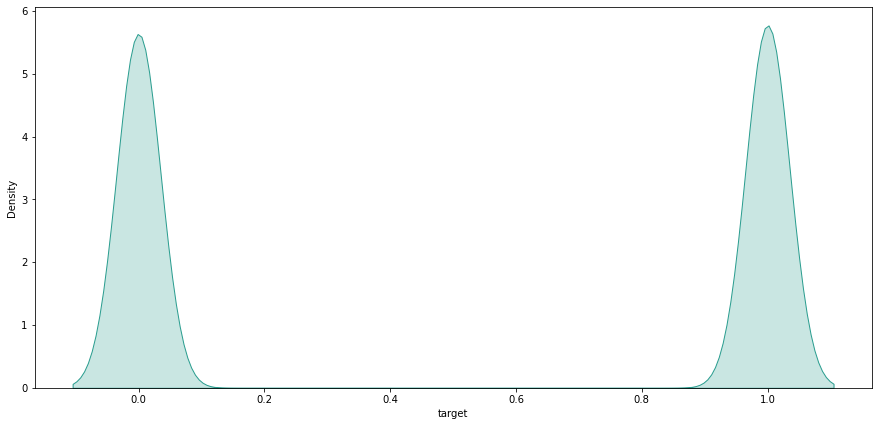

In [21]:
plt.figure(figsize=(15, 7))
sns.kdeplot(train["target"] ,fill=True, color = "#2a9d8f")

# **<span style="color:#e76f51;">Target Class Balance</span>**

([<matplotlib.patches.Wedge at 0x7f9aef842850>,
 [Text(-0.02764316099622886, 1.0996526068036836, '0'),
  Text(0.027643263953136023, -1.0996526042155392, '1')],
 [Text(-0.015078087816124831, 0.5998105128020091, '50.8%'),
  Text(0.01507814397443783, -0.5998105113902941, '49.2%')])

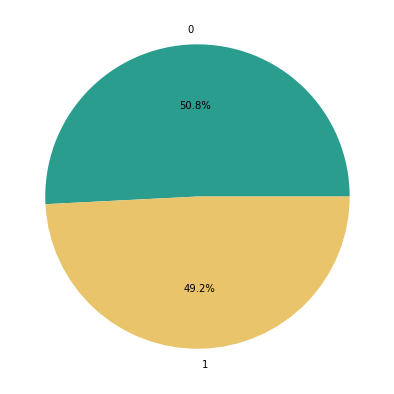

In [22]:
plt.figure(figsize=(15, 7))
plt.pie([508,492], labels = ["0" , "1"],autopct='%1.1f%%',colors = ["#2a9d8f", "#e9c46a"])


# **<span style="color:#e76f51;">Distribution of features</span>**

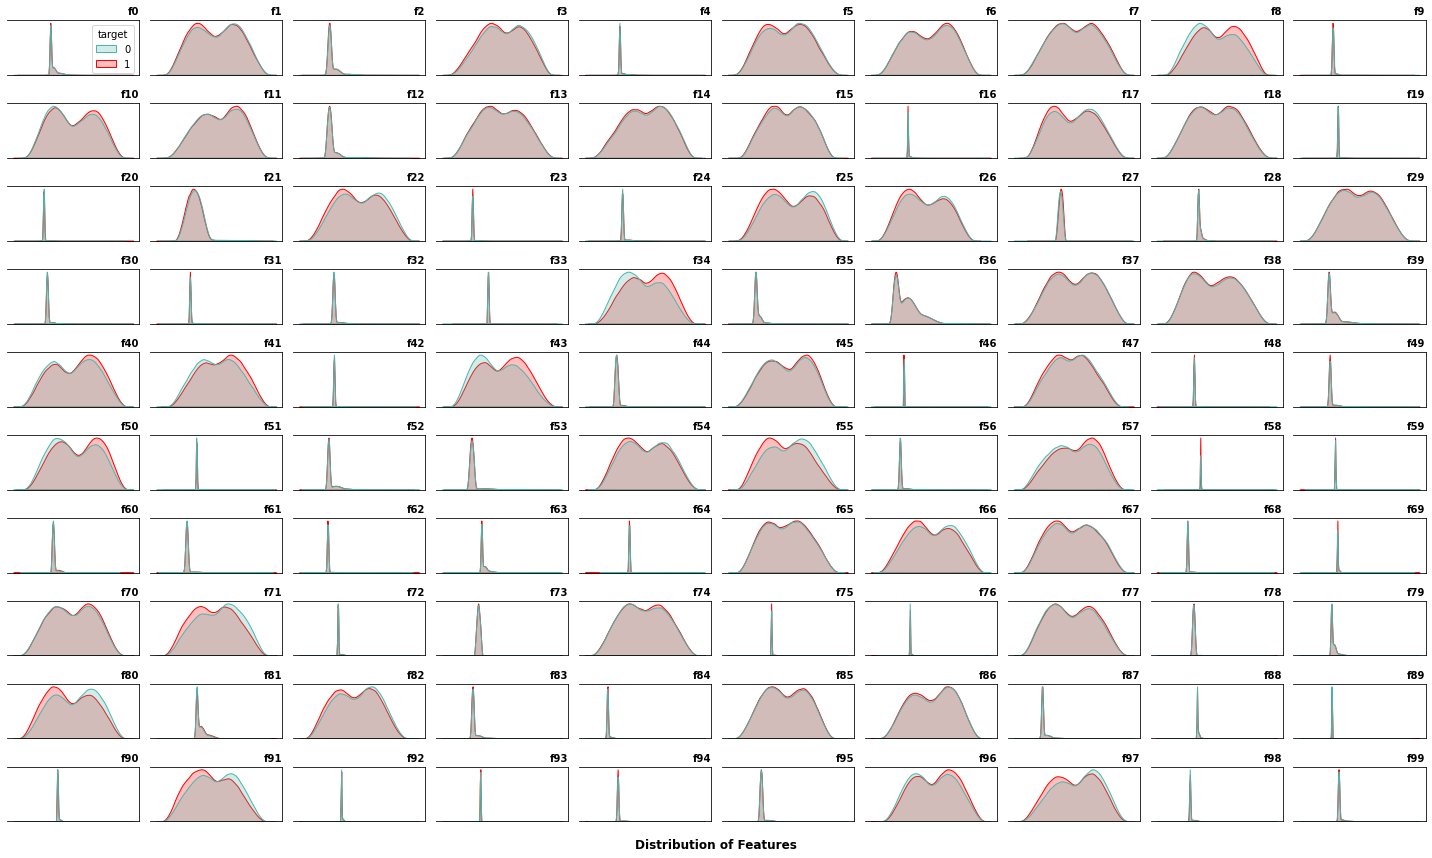

In [23]:
fig, axes = plt.subplots(10,10, figsize=(20, 12))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    
    sns.kdeplot(
        data=train, ax=ax, hue='target', fill=True,
        x=f'f{idx}', palette=['#4DB6AC', 'red'], legend=idx==0
    )
 
    ax.set_xticks([]); ax.set_yticks([]); ax.set_xlabel('')
    ax.set_ylabel(''); ax.spines['left'].set_visible(False)
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Distribution of Features', ha='center', fontweight='bold')
fig.tight_layout()
plt.show()


# **<span style="color:#e76f51;">Logging to W & B environment</span>**

In [24]:
import chart_studio

In [25]:
# Log Plots to W&B environment
title = "Distribution of Target Feature"
run = wandb.init(project='TPSNovember', name=title,anonymous=anony,config=CONFIG)
fig = sns.kdeplot(train["target"] , color = "#E4916C")
wandb.log({"Distribution of Target Feature": fig})
wandb.finish()

In [26]:
X = train.drop('target', axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size = 0.2,random_state = 0)

# **<span style="color:#e76f51;">Modelling using Diffprivlib</span>**

In [27]:
clf = GaussianNB()
clf.fit(X_train, y_train)

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.



GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([-3.39508009e+00, -1.22396004e+00, -1.84253003e+03, -1.36855996e+00,
       -3.20620990e+00, -1.16977000e+00, -1.05245996e+00, -1.28197002e+00,
       -1.24202001e+00, -2.57784009e+00, -1.30973005e+00, -1.45157003e+00,
       -5.91615021e-01, -1.23249996e+00, -1.21388996e+00, -1.45053995e+00,
       -1.81695995e+01,...
       3.87550011e+01, 6.26851988e+00, 3.37828994e+00, 1.27384996e+01,
       6.38888979e+00, 1.71952991e+01, 6.80396986e+00, 4.80527020e+00,
       4.52247009e+01, 6.87698984e+00, 6.44687986e+00, 8.73066998e+00,
       3.09081001e+01, 1.23476000e+01, 6.36439991e+00, 6.57389021e+00,
       1.79755993e+01, 1.02117996e+01, 8.62327003e+00, 3.65721989e+00,
       6.25436020e+00, 6.14529991e+00, 1.07670002e+01, 5.94703007e+00])))

In [28]:
clf.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0], dtype=int8)

In [29]:
print("Test accuracy: %f" % clf.score(X_test, y_test))


Test accuracy: 0.525983


In [32]:
epsilons = np.logspace(-2, 2, 50)
epsilons

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no ad

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no ad

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.

/Users/admin/opt/anaconda3/envs/hwankam/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning:

Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.



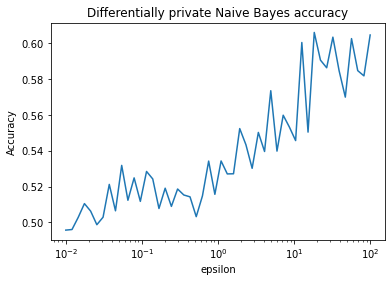

In [33]:
accuracy = list()

epsilons = np.logspace(-2, 2, 50)

for epsilon in epsilons:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy) # log 그래프를 그릴 때 사용.
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

Some example notebooks to experiment with is present in the official github repository

[Github](https://github.com/IBM/differential-privacy-library)

# **<span style="color:#e76f51;">Resources for Differential Privacy</span>**

https://privacytools.seas.harvard.edu/differential-privacy

The Algorithmic Foundations of Differential Privacy (Cynthia Dwork., Aaron Roth).

Deep Learning with Differential Privacy (M Abadi, A Chu, I Goodfellow, HB McMahan)

Concentrated Differential Privacy (Cynthia Dwork, Guy N. Rothblum)

References :

https://www.kaggle.com/sergiosaharovskiy/tps-nov-2021-a-complete-guide